### NIM         : 2201741971 / 2401822232
### Name        : Edward
### Class       : LTY2
### Course      : Selected Topics in Computational Intelligence II
### Course Code : COMP8039041
### Source    : https://github.com/anugraharief/Clustering-GeneticAlgorithm/blob/main/Clustering_GeneticAlgorithm.ipynb

### Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### Defined Coordinates

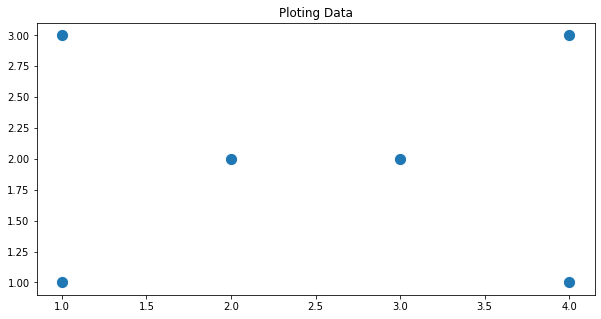

In [2]:
x = np.array([1, 1, 2, 3, 4, 4])
y = np.array([1, 3, 2, 2, 1, 3])

plt.figure(figsize=(10,5))
sns.scatterplot(x=x, y=y, s=150, palette="Set1")
plt.title("Ploting Data")
plt.show()

### Defined Function to Get Distance of Each Point

In [3]:

def Distance(x, y):
    dist = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(len(x))], dtype=int)
    
    return dist

### Defined Fitness Function to be Improved with Genetic Algorithm

In [4]:
def Fitness(p, dist):
    popFit = p.copy()
    popFit["fitness"] = [sum(list(map(lambda x: sum(dist[x]), p.iloc[i,:-1]))) for i in range(len(p))]
    
    return popFit

### Defined Function to Create Population

In [5]:
def CreatePopulation(n_chrom, cluster, n_point, dist):
    arr_pop = np.array([np.random.permutation(n_point)[:cluster] for i in range(n_chrom)])
    pop = pd.DataFrame(arr_pop)
    
    pop["fitness"] = 0
    pop = Fitness(pop, dist)
    
    return pop

### Defined Function to Crossover in Genetic Algorithm

In [6]:
def Crossover(pop, dist):
    n = len(pop)
    m = len(pop.keys()) - 1
    popc = pop.copy()
    
    for i in range(n):
        n1, n2 = np.random.permutation(n)[:2]
        idx = np.random.randint(0,m)
        
        temp1 = list(pop.iloc[n1,:-1])
        temp2 = list(pop.iloc[n2,:-1])
        
        if temp1[idx] in temp2:
            temp2.remove(temp1[idx])
            temp2.insert(idx,temp1[idx])
        else:
            temp2[idx] = temp1[idx]
        temp2.append(pop.iloc[n2,-1])
        
        popc.loc[i] = temp2
    
    popc = Fitness(popc, dist)
    
    return popc

### Defined Function to Mutation in Genetic Algorithm

In [7]:
def Mutation(popc, dist):
    n = len(popc)
    m = len(popc.keys()) - 1
    popm = popc.copy()
    
    for i in range(n):
        temp = list(map(lambda x: x-1 if x!=0 else max(popc.iloc[i,:-1]), popc.iloc[i,:-1]))
        temp.append(popc.iloc[i,-1])
        popm.loc[i] = temp
    
    popm = Fitness(popm, dist)
    
    return popm

### Defined Function to Selection in Genetic Algorithm

In [8]:
def CombineAndSelection(pop, popc, popm):
    n = len(pop)
    
    popAll = pop.copy()
    popAll = popAll.append(popc, ignore_index=True)
    popAll = popAll.append(popm, ignore_index=True)
    
    popAll = popAll.sort_values(by=['fitness'])
    popAll.index = range(len(popAll))
    
    popAll = popAll.drop_duplicates()
    popAll = popAll.head(n)
    
    return popAll

### Defined Function to Predict Cluster in Genetic Algorithm

In [9]:
def PredictCluster(chrom, n_point, dist):
    arr_index = np.arange(0, n_point)
    list_cluster = [np.array(list(map(lambda x: dist[x,idx], chrom))).argmin() for idx in arr_index]
    
    return list_cluster

### Defined Function to Plotting Solution

In [10]:
def PlotSolution(x, y, cluster, Title=""):
    arr_index = np.arange(0, len(x))
    plt.figure(figsize=(10,5))
    sns.scatterplot(x, y , hue=cluster, style=cluster, s=150, palette="Set1", legend="full")
    
    plt.legend(title="Cluster")
    plt.title(Title)
    plt.show()

### Defined Function to Clustering based Genetic Algorithm

In [11]:
def ClusteringGeneticAlgorithm(x, y, n_chrom=10, cluster=2, p_cross=1, p_mut=1, 
                                    max_generate=10, plot_step=False, step=1):
    
    dist = Distance(x=x, y=y)
    
    pop = CreatePopulation(n_chrom, cluster, len(x), dist)
    PlotSolution(x, y, np.zeros(len(x), dtype=int), Title="Ploting Data Sebelum Klastering")
    print()

    for i in range(max_generate):
        pc = np.random.rand()
        pm = np.random.rand()

        popc = pop.copy()
        popm = pop.copy()

        if pc < p_cross:
            popc = Crossover(pop, dist)
            
        if pm < p_mut:
            popm = Mutation(popc, dist)
            
        pop = CombineAndSelection(pop, popc, popm)
        
        if plot_step and i%step==0:
            print()
            print('Clustering pada generasi ke',i)
            list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
            PlotSolution(x, y, list_cluster, Title="Ploting Clustering")
            
    print()
    print('Clustering akhir')
    list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
    PlotSolution(x, y, list_cluster, Title="Clustering Final")

### Test Function

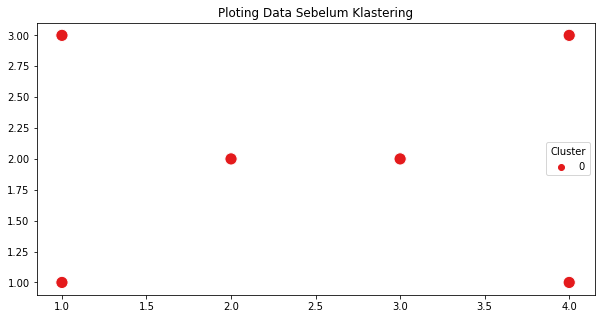



Clustering pada generasi ke 0


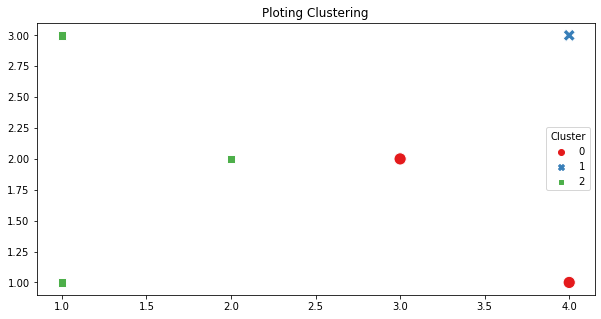


Clustering pada generasi ke 10


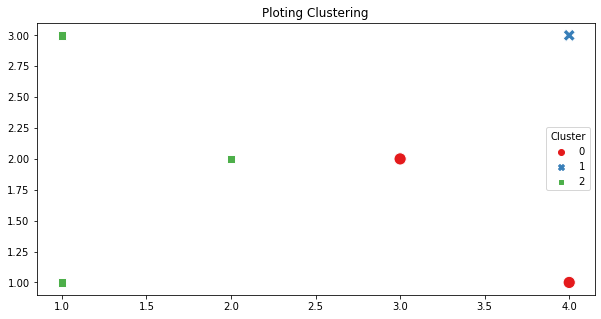


Clustering pada generasi ke 20


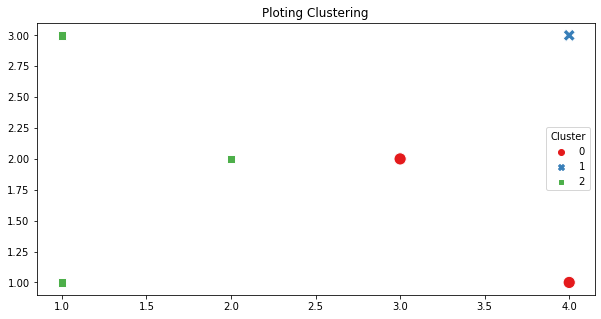


Clustering pada generasi ke 30


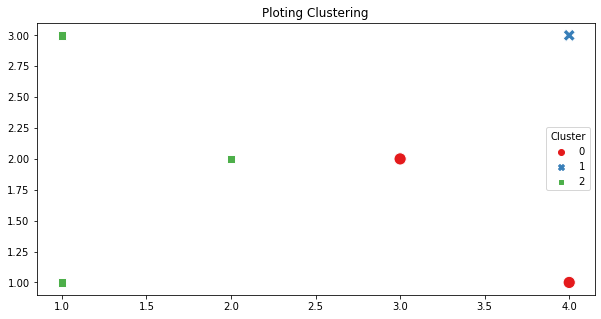


Clustering pada generasi ke 40


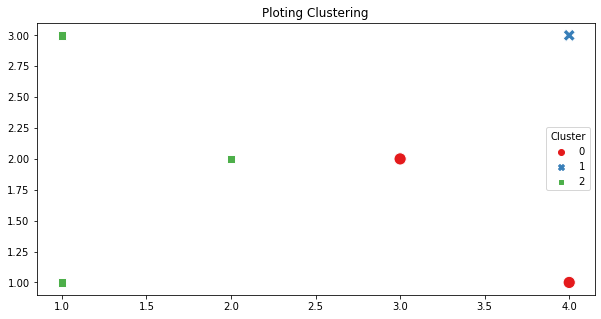


Clustering pada generasi ke 50


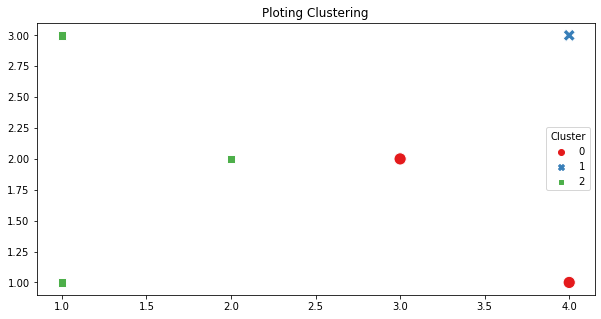


Clustering pada generasi ke 60


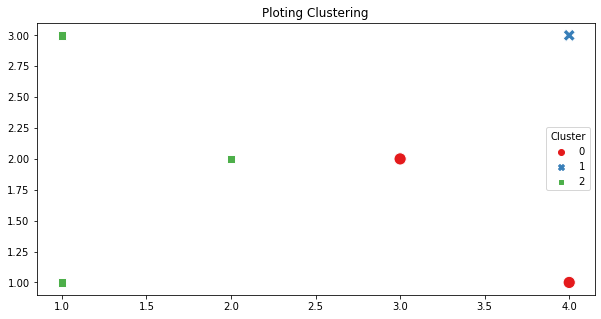


Clustering pada generasi ke 70


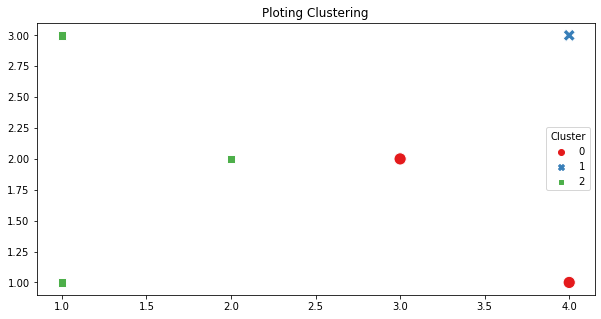


Clustering pada generasi ke 80


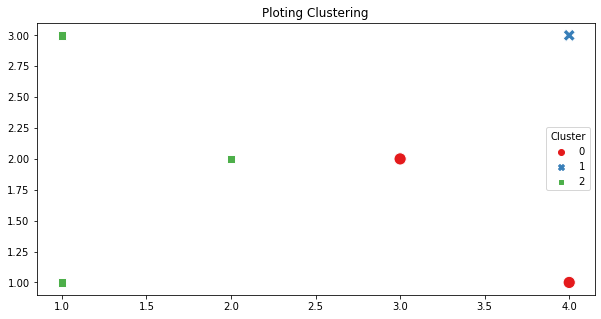


Clustering pada generasi ke 90


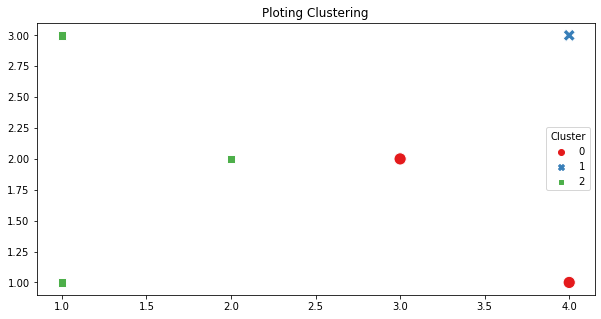


Clustering akhir


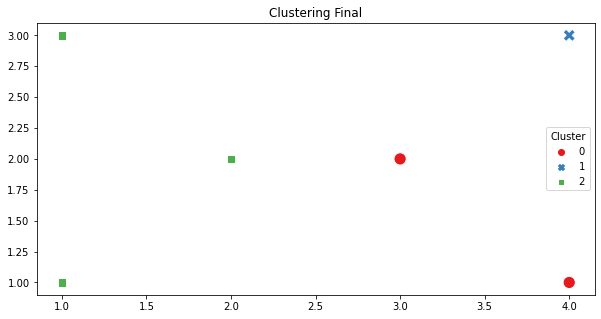

In [15]:
ClusteringGeneticAlgorithm(x, y, n_chrom=100, cluster=3, max_generate=100, plot_step=True, step=10)

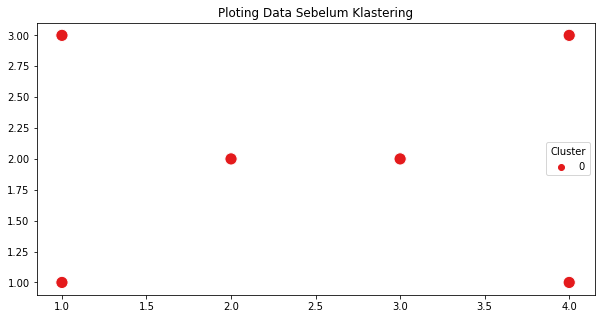



Clustering pada generasi ke 0


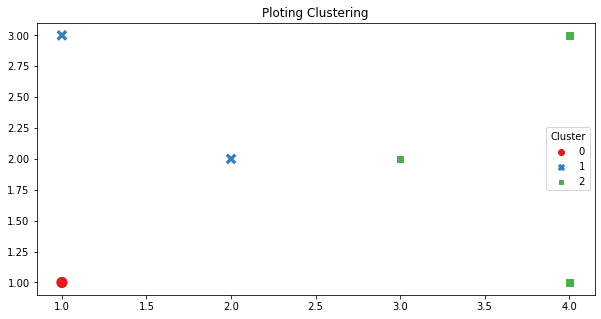


Clustering pada generasi ke 10


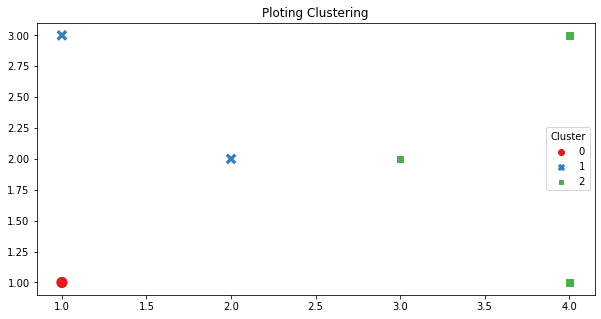


Clustering pada generasi ke 20


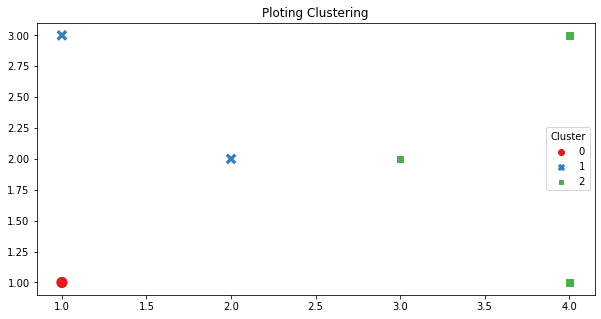


Clustering pada generasi ke 30


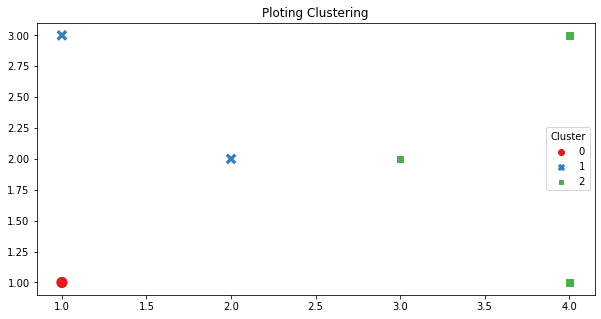


Clustering pada generasi ke 40


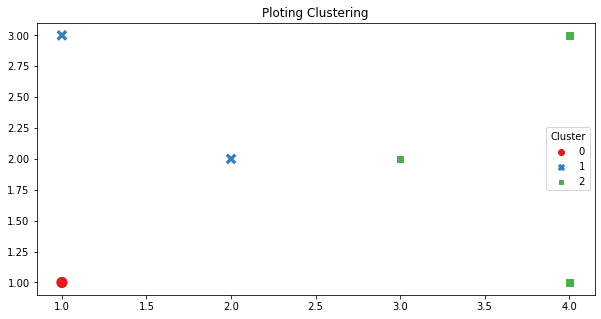


Clustering pada generasi ke 50


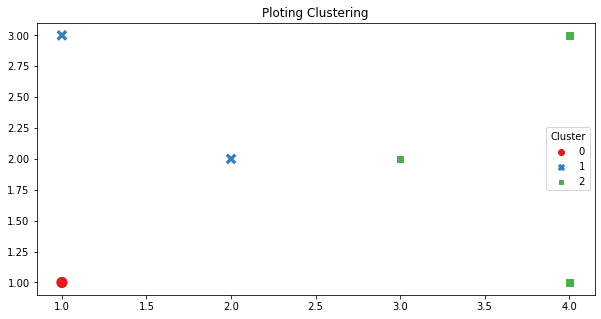


Clustering pada generasi ke 60


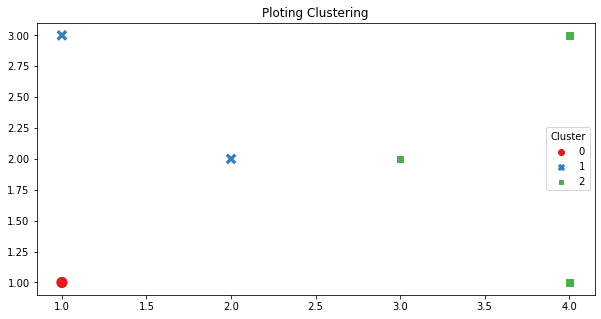


Clustering pada generasi ke 70


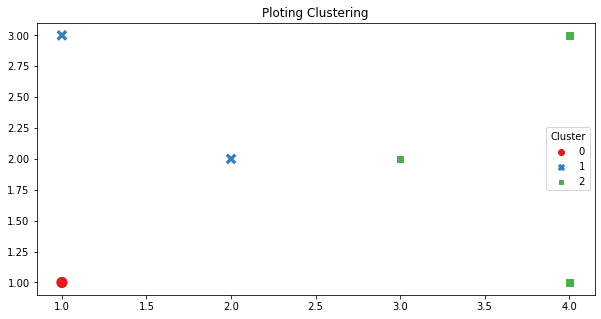


Clustering pada generasi ke 80


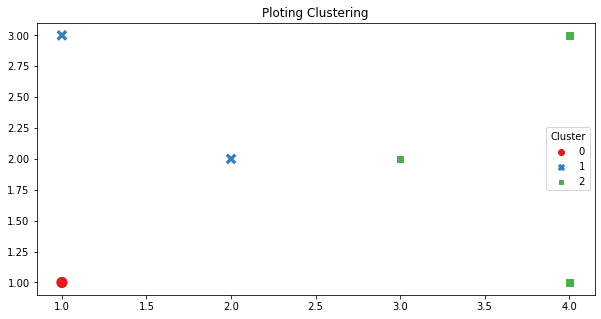


Clustering pada generasi ke 90


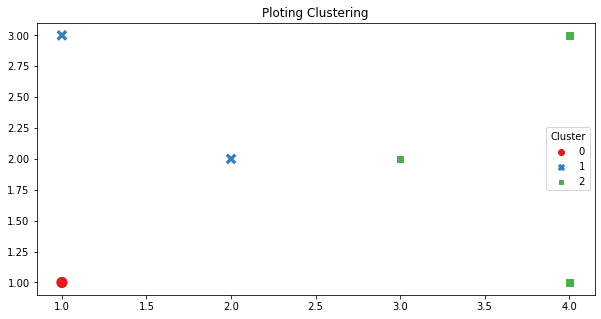


Clustering akhir


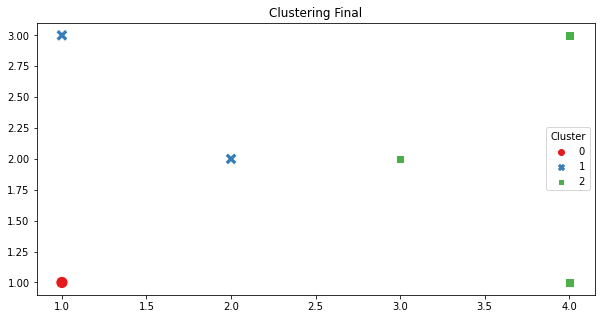

In [17]:
ClusteringGeneticAlgorithm(x, y, n_chrom=200, cluster=3, max_generate=100, plot_step=True, step=10)

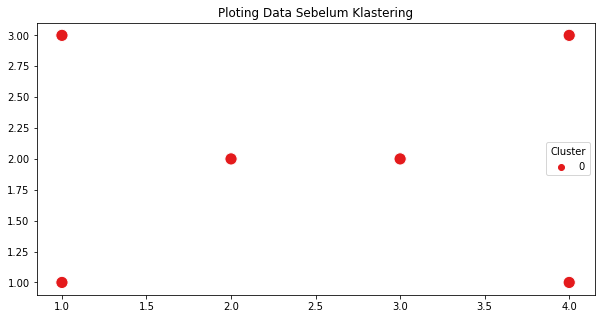



Clustering pada generasi ke 0


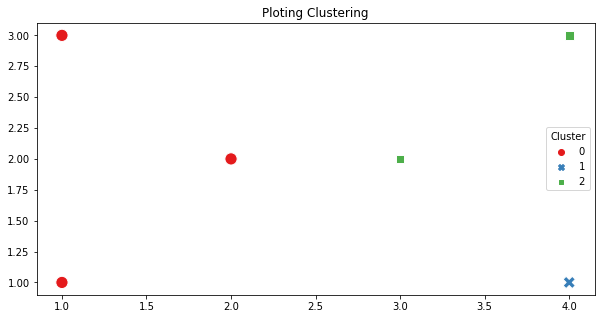


Clustering pada generasi ke 10


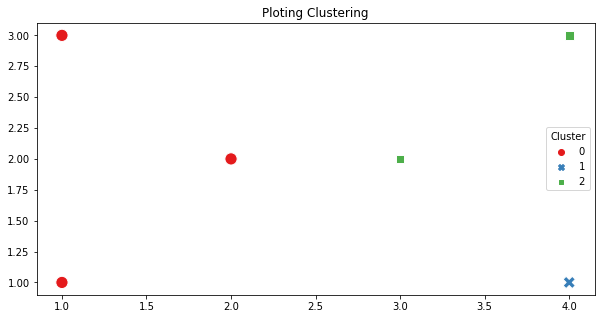


Clustering pada generasi ke 20


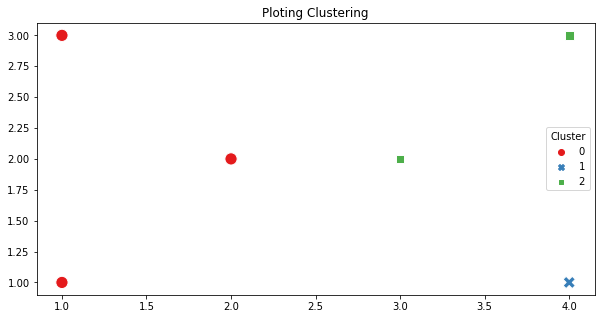


Clustering pada generasi ke 30


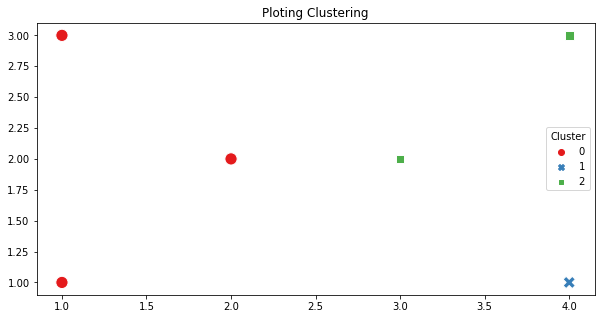


Clustering pada generasi ke 40


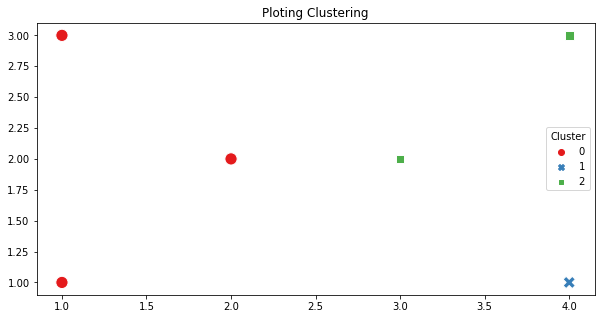


Clustering pada generasi ke 50


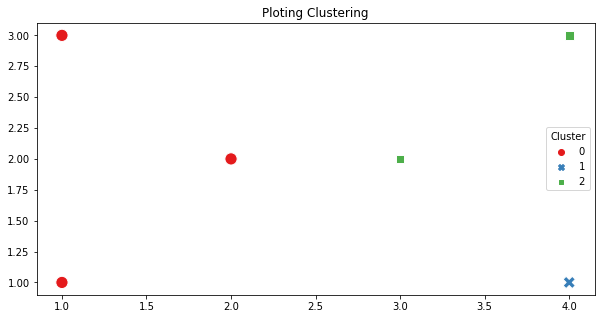


Clustering pada generasi ke 60


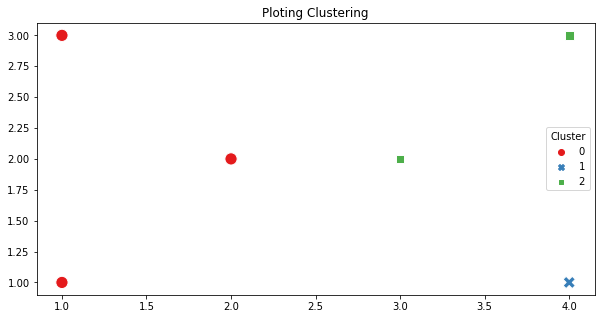


Clustering pada generasi ke 70


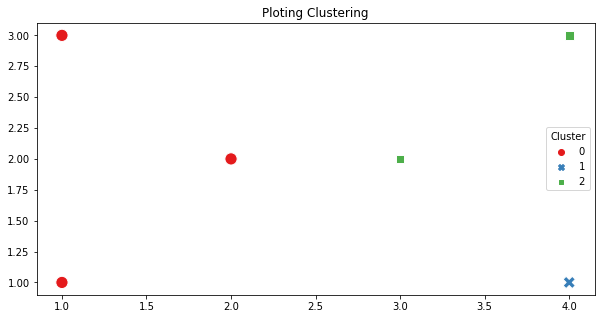


Clustering pada generasi ke 80


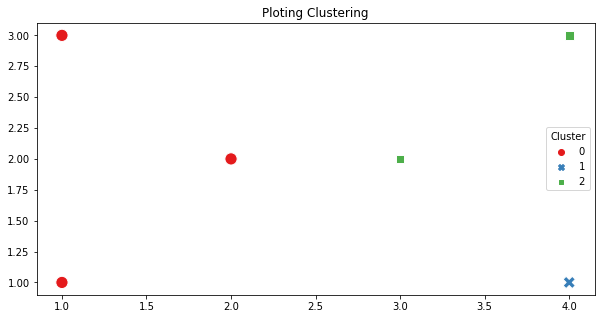


Clustering pada generasi ke 90


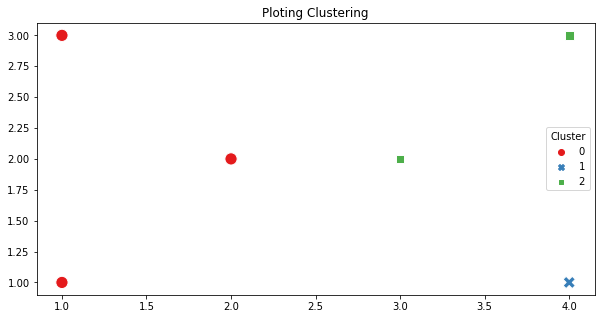


Clustering akhir


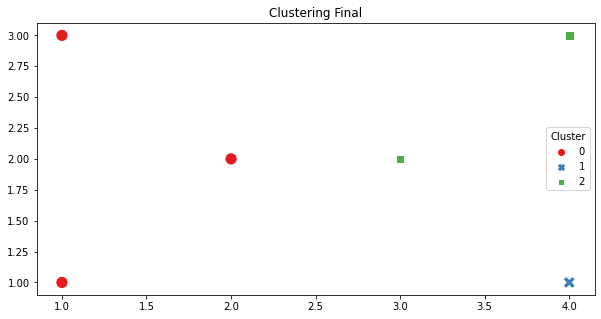

In [18]:
ClusteringGeneticAlgorithm(x, y, n_chrom=300, cluster=3, max_generate=100, plot_step=True, step=10)

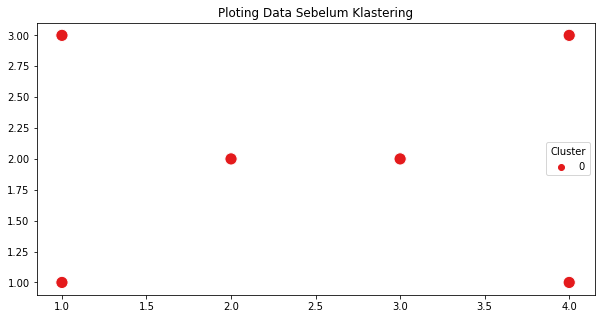



Clustering pada generasi ke 0


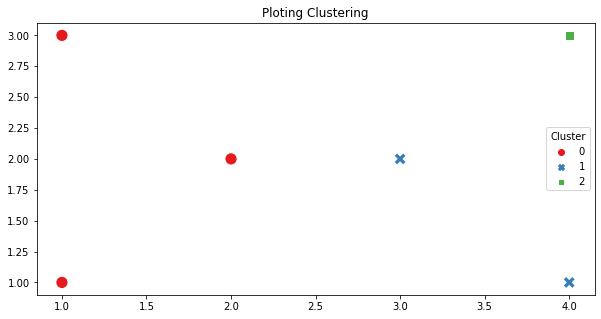


Clustering pada generasi ke 10


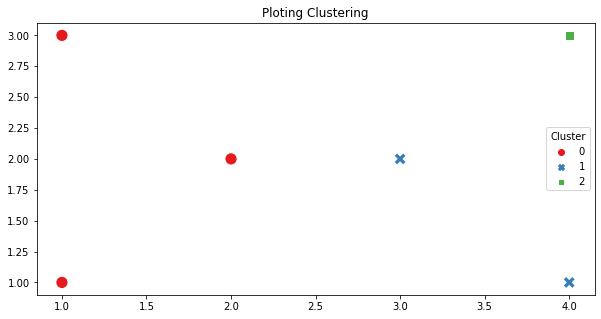


Clustering pada generasi ke 20


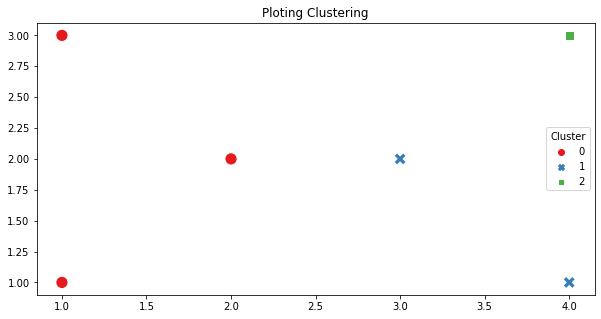


Clustering pada generasi ke 30


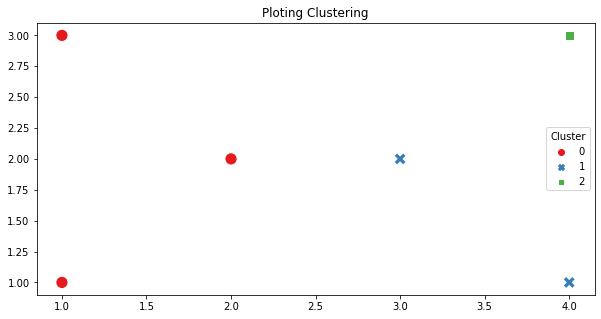


Clustering pada generasi ke 40


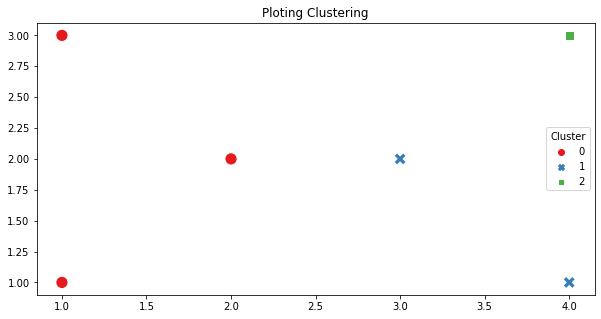


Clustering pada generasi ke 50


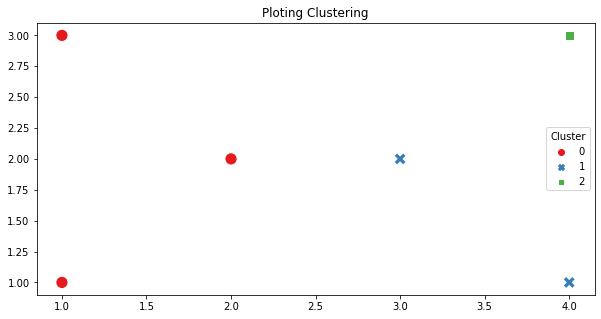


Clustering pada generasi ke 60


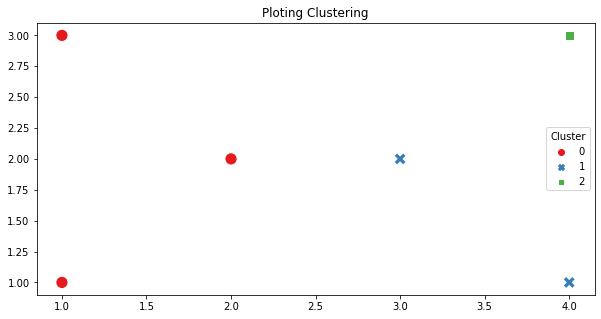


Clustering pada generasi ke 70


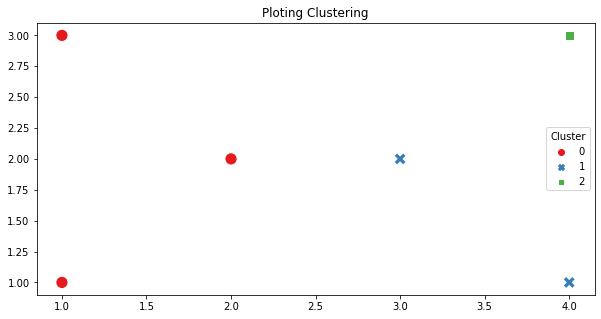


Clustering pada generasi ke 80


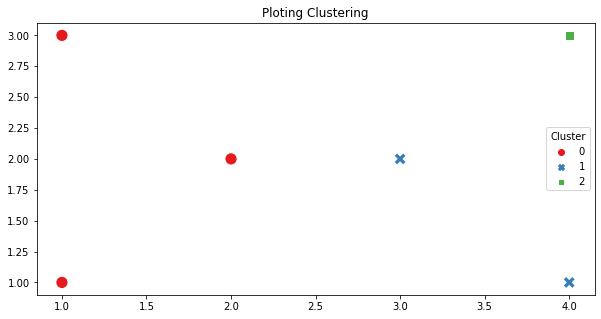


Clustering pada generasi ke 90


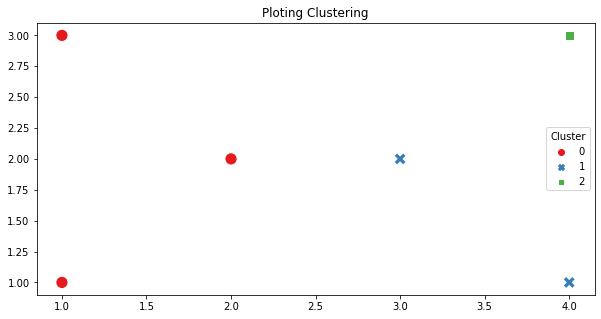


Clustering akhir


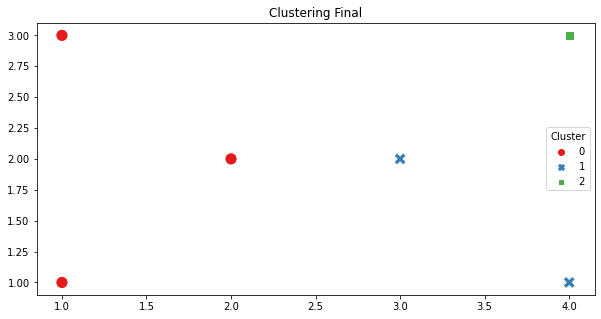

In [19]:
ClusteringGeneticAlgorithm(x, y, n_chrom=400, cluster=3, max_generate=100, plot_step=True, step=10)

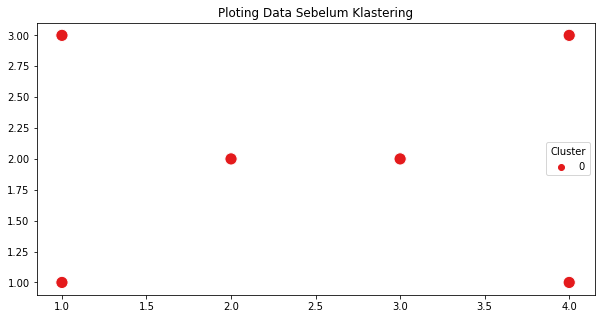



Clustering pada generasi ke 0


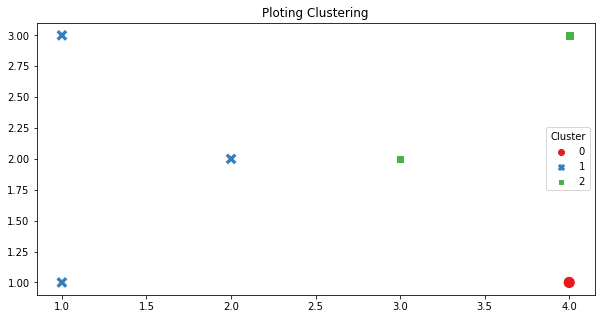


Clustering pada generasi ke 10


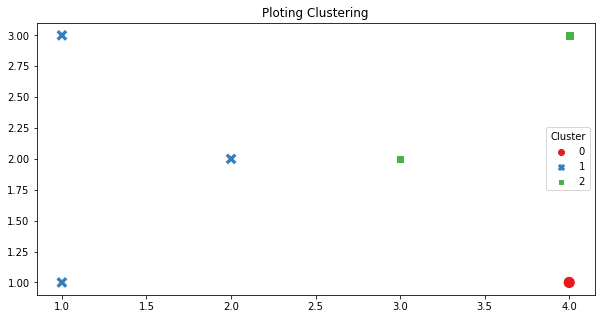


Clustering pada generasi ke 20


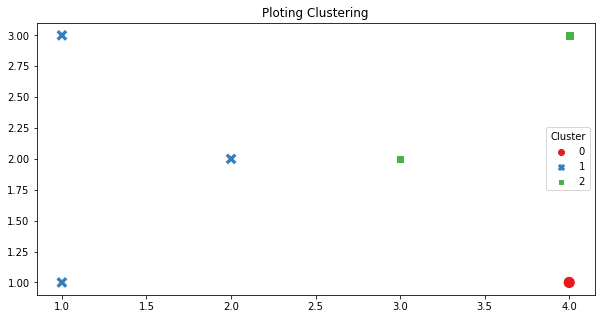


Clustering pada generasi ke 30


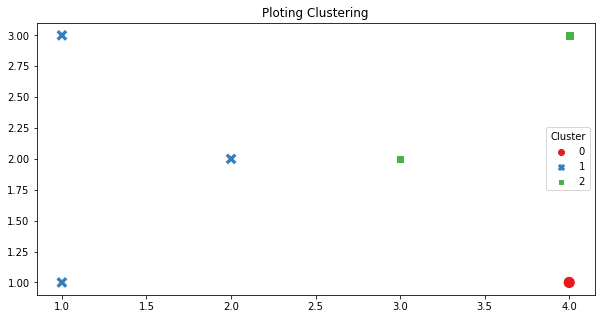


Clustering pada generasi ke 40


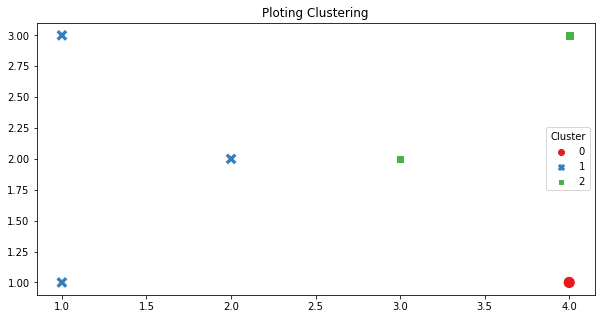


Clustering pada generasi ke 50


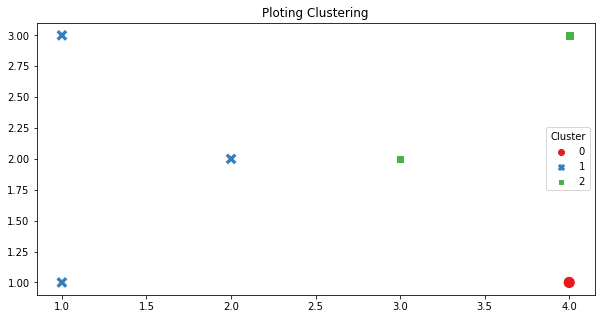


Clustering pada generasi ke 60


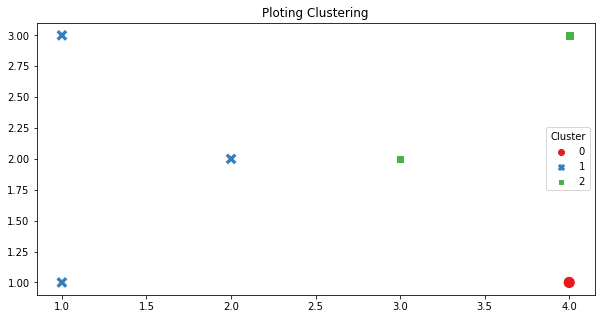


Clustering pada generasi ke 70


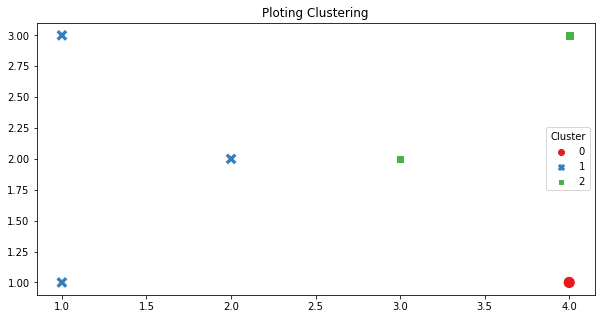


Clustering pada generasi ke 80


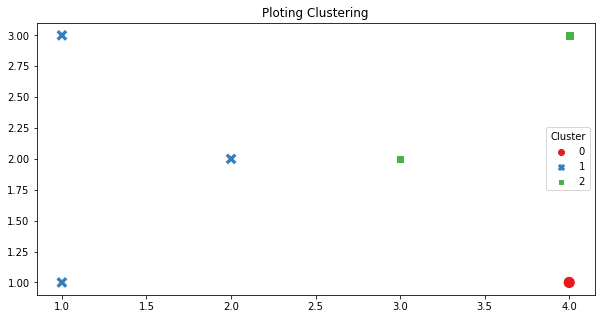


Clustering pada generasi ke 90


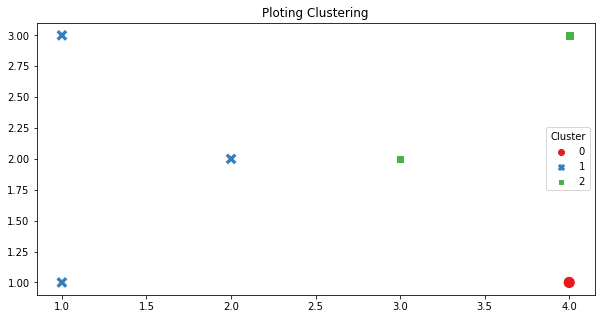


Clustering akhir


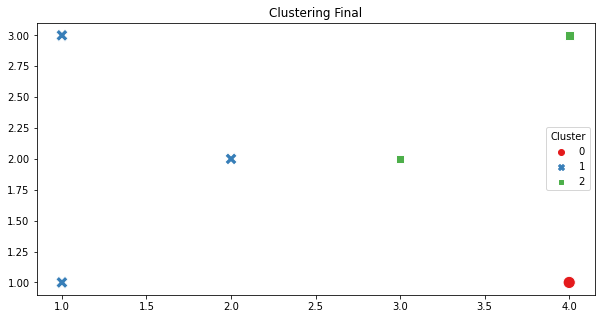

In [20]:
ClusteringGeneticAlgorithm(x, y, n_chrom=500, cluster=3, max_generate=100, plot_step=True, step=10)